In [11]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import os
import numpy as np
% matplotlib inline

In [12]:
files = os.listdir("camera_cal")

In [13]:
n_width_point = 9
n_height_point = 6

objp = np.zeros((n_width_point*n_height_point,3),np.float32)
objp[:,:2] = np.mgrid[0:n_width_point,0:n_height_point].T.reshape(-1,2)
objpoints = []
imgpoints = []

for filename in files:
    
    path = "camera_cal/" + filename
    img = cv2.imread(path)
   
    # convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # find corners
    ret,corners = cv2.findChessboardCorners(gray,(n_width_point,n_height_point),None)
    
    # If found, add object points, image points
    if ret == True:
        print(filename)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (n_width_point,n_height_point), corners, ret)
        
        cv2.imshow('img', img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

calibration10.jpg
calibration11.jpg
calibration12.jpg
calibration13.jpg
calibration14.jpg
calibration15.jpg
calibration16.jpg
calibration17.jpg
calibration18.jpg
calibration19.jpg
calibration2.jpg
calibration20.jpg
calibration3.jpg
calibration6.jpg
calibration7.jpg
calibration8.jpg
calibration9.jpg


In [14]:
import pickle

img_size = (1280,720)
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

# Save the camera calibration result for later use 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle,open("camera_cal/wide_dist_pickle.p", "wb" ))

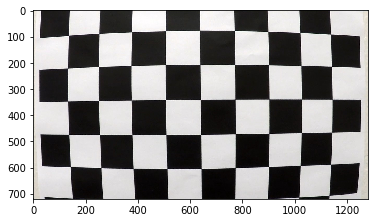

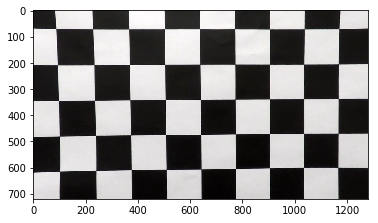

In [15]:
# undistort image
img = mpimg.imread("camera_cal/calibration1.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(dst)

In [16]:
# Choose a Sobel kernerl size
ksize = 3

In [17]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply cv2.Sobel
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0)
    else:
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    binary = np.zeros_like(scaled_sobel)
    
    binary[ (scaled_sobel >= thresh_min) & (scaled_sobel < thresh_max)] = 1
    return binary

In [143]:
def mag_thresh(img, sobel_kernel=3, thresh_min=0,thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    mag = np.sqrt(sobelx**2 + sobely**2)
    scale_mag = np.uint8(mag*255/np.max(mag))
    
    # Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scale_mag)
    binary_output[(scale_mag >= thresh_min) & (scale_mag <= thresh_max)] = 1
    return binary_output

In [144]:
def dir_thresh(img, sobel_kernel=3,thresh_min=0,thresh_max=np.pi/2):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    direction = np.arctan2(abs_sobelx,abs_sobely)
    binary_output = np.zeros_like(direction)
    binary_output[(direction >= thresh_min) & (direction <= thresh_max)] = 1
    return binary_output

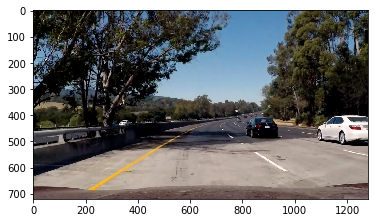

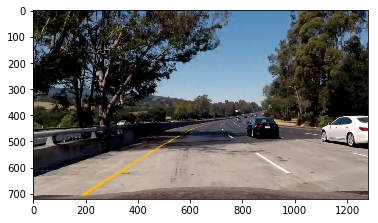

In [165]:
test_image = mpimg.imread('test_images/test5.jpg')
plt.figure()
plt.imshow(test_image)

# undistort image
dst = cv2.undistort(test_image,mtx,dist,None,mtx)
plt.figure()
plt.imshow(dst)




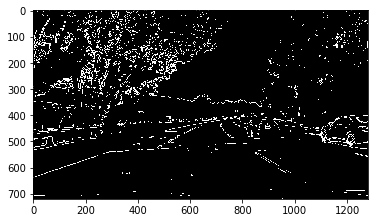

In [166]:
mag_binary = mag_thresh(dst,15,50,150)
plt.imshow(mag_binary,cmap='gray')


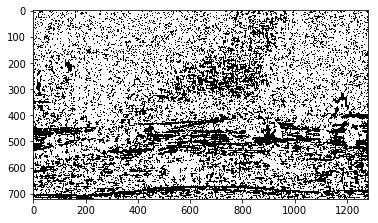

In [167]:
dir_binary = dir_thresh(dst,15,0.3,1.7)
plt.imshow(dir_binary,cmap='gray')

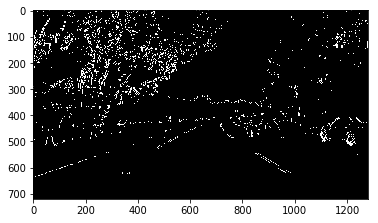

In [168]:
combine = np.zeros_like(dir_binary)
combine[(dir_binary==1) & (mag_binary==1)] = 1
plt.imshow(combine,cmap='gray')

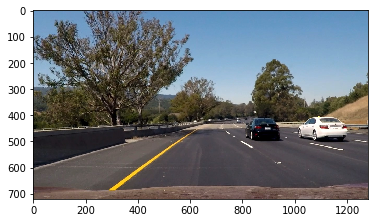

In [182]:
test_image = mpimg.imread('test_images/test6.jpg')
plt.imshow(test_image)

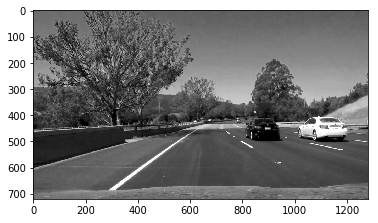

In [173]:
R = test_image[:,:,0]
plt.imshow(R,cmap='gray')

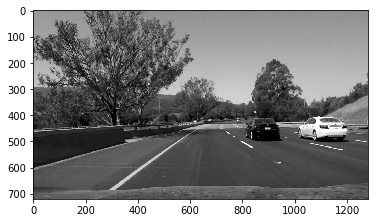

In [174]:
G = test_image[:,:,1]
plt.imshow(G,cmap='gray')

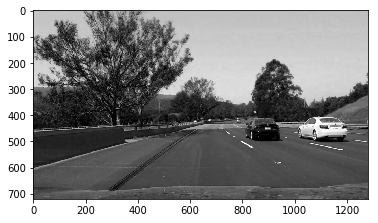

In [175]:
B = test_image[:,:,2]
plt.imshow(B,cmap='gray')

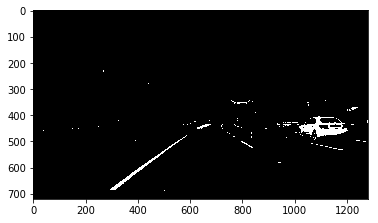

In [176]:
thresh = (200,255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(binary,cmap='gray')

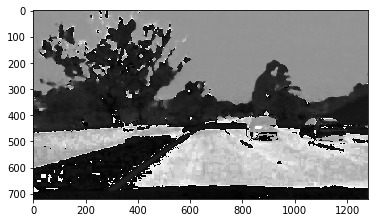

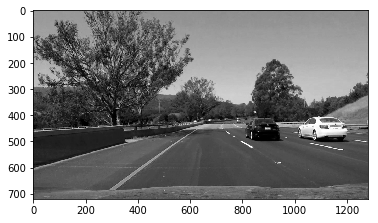

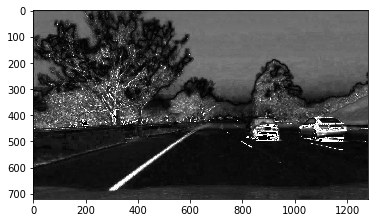

In [184]:
hls = cv2.cvtColor(test_image,cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
plt.figure()
plt.imshow(H,cmap='gray')
plt.figure()
plt.imshow(L,cmap='gray')
plt.figure()
plt.imshow(S,cmap='gray')

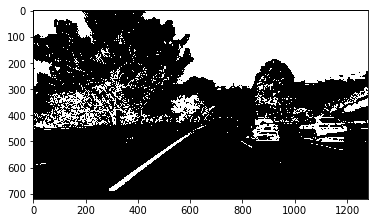

In [189]:
# The S channel picks up the lines well, so let's try applying a threshold there
thresh = (90,255)
binary = np.zeros_like(S)
binary[(S>=thresh[0]) & (S<=thresh[1])] = 1 
plt.imshow(binary,cmap='gray')